# Analyzing the Attributes of Wine Enthusiast's Wine Reviews

### Final Project for NYU Data Bootcamp Class, Spring 2019
#### By Bethel Hailemichael and Carmina Magnani

Project Description: Our project focuses on analyzing the different attributes of the wines reviewed by the Wine Enthusiast magazine. We focus on analyzing how the different countries of origin, pricing, grape varieties, and descriptions compare to the scores given to the wines. We also test our hypothesis about the length of a wine's description and its possible correlation to the type of scoring it receives. 

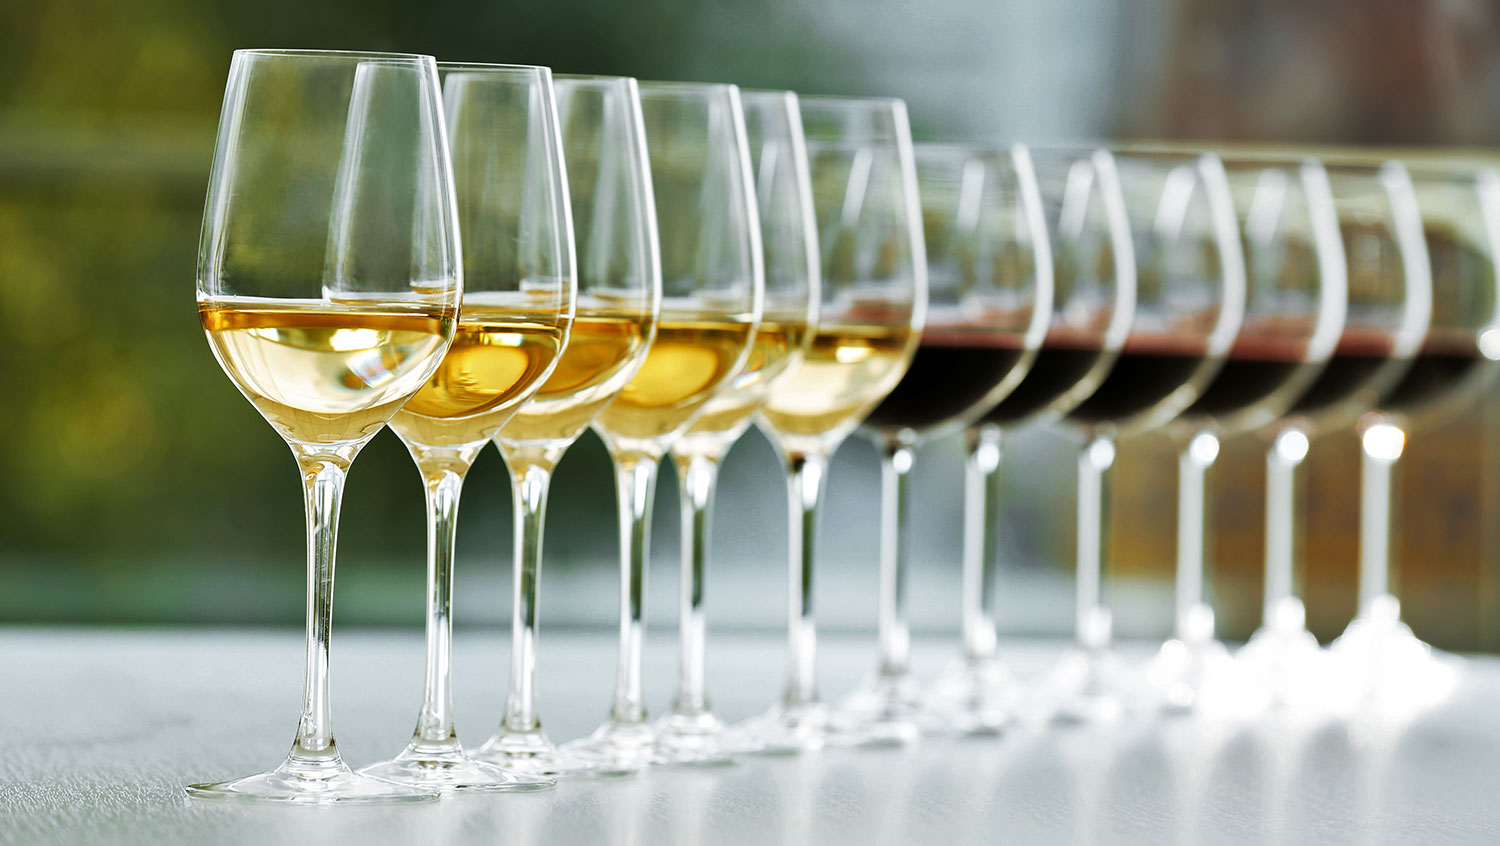

In [1]:
from IPython.display import Image, display
display(Image('https://www.iacac.org/wp-content/uploads/wine-tasting-1500x846.jpg', width=1900, unconfined=True))

## Part 1: Preparing the Data for Analysis
**Source**: Our data comes from the following [kaggle dataset](https://www.kaggle.com/zynicide/wine-reviews), which is based on data compiled from WineEnthusiast issues from  June 15th, 2017 and November 22nd, 2017.

### Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('winemag-data_first150k.csv')

In [4]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### Cleaning the Data

#### Removing NaN values

In [5]:
df.dropna(axis = 0, how ='any') 

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
12,12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene
15,15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
16,16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall


#### Removing "Unnamed" column to simplify display

In [6]:
df.drop(columns=['Unnamed: 0'])

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### Part 2: Preliminary Visualization

#### First, let's take a look at the top 25 wines in the ranking. We'll sort by country and price too to get a sense of the range of complexity of the data.

In [7]:
df1 = df.sort_values(by=['points'], ascending = False)
df1 = df1[['points','country','price']]
df1 = df1.head(25)
df1

,points,country,price
137099,100,US,200.0
19354,100,US,65.0
84035,100,Australia,300.0
84034,100,US,65.0
122767,100,US,100.0
2145,100,France,848.0
83536,100,France,1400.0
26296,100,France,1400.0
89399,100,US,200.0
24151,100,Italy,460.0


#### Per the results above, it seems that most of the wines (24 of them) share the highest score (100 points). Let's take a look now at the point distribution for all of the wines in the dataframe. 

In [8]:
df.points.describe()

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

#### We can see that from the 150,930 wines in the list, the mean point score for all wines is 87.9 and the minimum score is 80. This demonstrates that the list compiles the highest ranked wines from all over the world.

#### Additionally, let's look at the points distribution in a graphic format

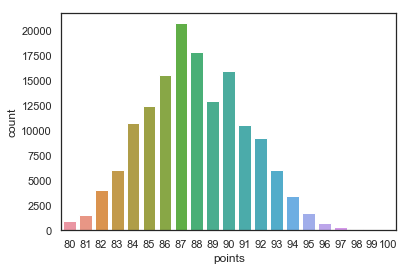

In [9]:
sns.countplot(df['points'])

#### Similarly, we can investigate if there is a wider variety in the distribution of the wines according to their price point.

In [10]:
df.price.describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

#### Here, we see that the average price point for the wines whose prices are recorded is \\$33.13, with the high-end price being \\$2,300 and the low-end being $4.00

#### Next, let's take a look at the number of countries that are represented on the list.

In [11]:
countries_reviewed1 = df['country'].nunique()
countries_reviewed = "There are {} countries in this list".format(countries_reviewed1)
print(countries_reviewed)

There are 48 countries in this list


#### Next, for each of the countries, let's sort them by the number of wines reviewed and also look at their lowest and highest priced wines.

In [12]:
countries_reviewed = df.groupby(['country']).price.agg([len, min, max])
countries_reviewed.sort_values(by='len')

,len,min,max
country,,,
US-France,1.0,50.0,50.0
Albania,2.0,20.0,20.0
Tunisia,2.0,NaN,NaN
Montenegro,2.0,10.0,10.0
Japan,2.0,24.0,24.0
Slovakia,3.0,15.0,16.0
China,3.0,7.0,27.0
Egypt,3.0,NaN,NaN
Switzerland,4.0,19.0,38.0


#### As we can see, the country with the highest quantity of wines reviewed is the US. Below is a visualization of the countries and their wine review count.

Number of country list in data: 48


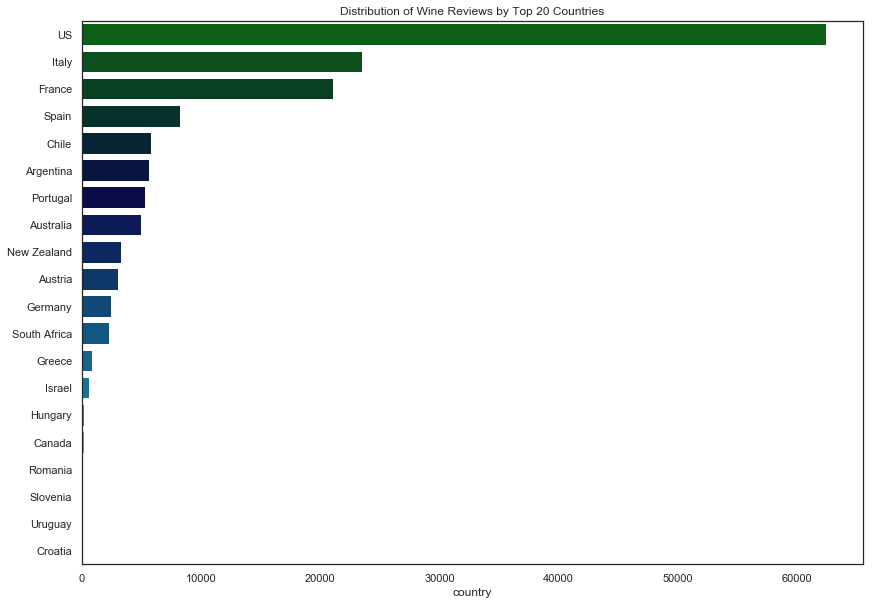

In [13]:
print('Number of country list in data:',df['country'].nunique())
plt.figure(figsize=(14,10))
cnt = df['country'].value_counts().to_frame()[0:20]
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wine Reviews by Top 20 Countries');

#### Lastly, we can take a look at the relationship between the countries listed and the average price of the wines reviewed.

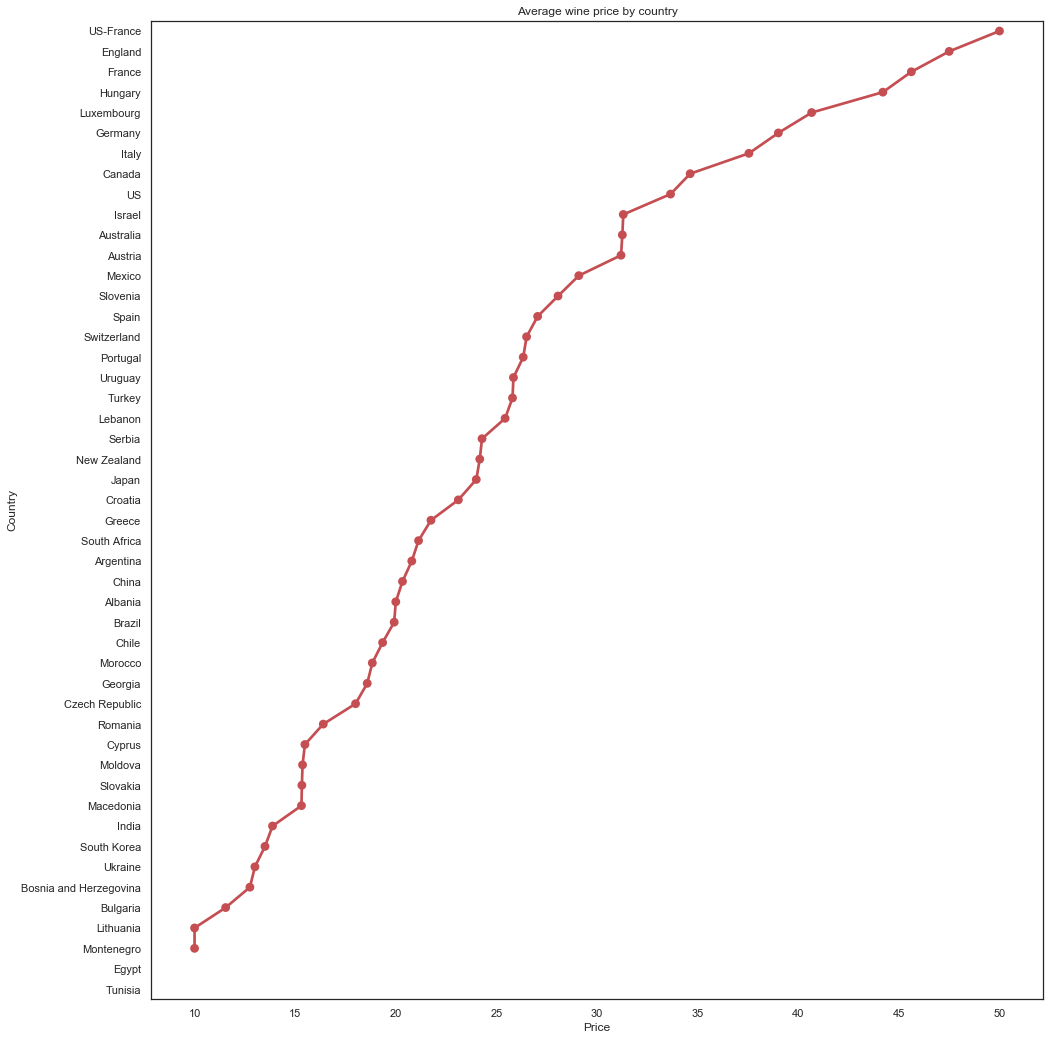

In [14]:
cnt = df.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,18))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Average wine price by country')
plt.xlabel('Price')
plt.ylabel('Country');

### Part 3: Testing if Description Length is a Predictor of Points Awarded

#### For this section, we'll evaluate whether a wine's description can be used to predict its score. First, let's start by importing a few packages that will help us visualize the data.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import text 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from scipy import stats
from time import time

#### We will then start by simplifying the data. We will work with the columns that are relevant for our analysis and rename them.

In [16]:
df1 = df[['description', 'points']]
df1.rename(columns={'description':'Description',
                   'points':'Score'},
                   inplace=True)

#### Additionally, we want to isolate any records with empty descriptions, so we will add a column for the description length.

In [17]:
df1["Description_Length"] = [len(desc) for desc in df1['Description']]

#### Now, we will check if there are any missing values in our new column.

In [18]:
print("Number of missing values for the Score feature: ", len(df1[df1['Score'].isnull()]))
print("Number of missing descriptions: ", len(df1[df1['Description_Length']==0]))

Number of missing values for the Score feature:  0
Number of missing descriptions:  0


#### As we can see, there are no missing descriptions in the list. 
#### We will now proceed to test our hypothesis: whether the length of a wine's description is useful for predicting a wine's score.

In [19]:
df1.describe()

,Score,Description_Length
count,150930.000000,150930.000000
mean,87.888418,240.373948
std,3.222392,69.196308
min,80.000000,17.000000
25%,86.000000,193.000000
50%,88.000000,236.000000
75%,90.000000,282.000000
max,100.000000,829.000000


#### By looking at the statistics associated with the description, we can see that the average length for this field is 240 words. Let's drill further into the wine scores.

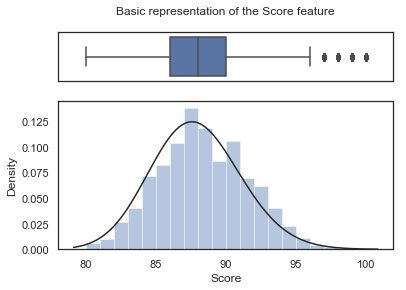

In [20]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (0.25, 0.75)})
sns.boxplot(df1["Score"], ax=ax_box).set_title("Basic representation of the Score feature\n")
sns.distplot(df1["Score"], ax=ax_hist, kde=False, fit=stats.gamma, bins=20) 
ax_box.set(xlabel='')
ax_hist.set(ylabel='Density')
plt.show()

In [21]:
Q3 = np.quantile(df1['Score'], 0.75) 
Q1 = np.quantile(df1['Score'], 0.25) 
IQR = Q3 - Q1 

outlier_score_threshold =  Q3 + 1.5 * IQR
outlier_number=len(df1[ df1['Score'] > outlier_score_threshold ])

print("Number of outliers:", outlier_number,
      "\nOutlier proportion:", round(outlier_number/len(df1['Score'])*100, 3),"%",
      "\nOutlier threshold score:", outlier_score_threshold,"/ 100")

Number of outliers: 570 
Outlier proportion: 0.378 % 
Outlier threshold score: 96.0 / 100


#### We can now observe that out of the 150k+ wines, only 570 of them stand out as outliers with a score that exceeds 96 points. This may be due to either tougher standards for the top-tier wines and/or scarcity in the amount of wines that meet this score.

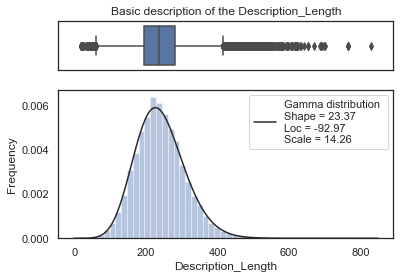

In [22]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (0.25, 0.75)})
sns.boxplot(df1["Description_Length"], 
            ax=ax_box).set_title("Basic description of the Description_Length")
sns.distplot(df1["Description_Length"], 
             ax=ax_hist, kde=False, fit=stats.gamma, bins=50) 
alpha, loc, beta = stats.gamma.fit(df1['Description_Length'])
plt.legend(['Gamma distribution \nShape = {0:.2f} \nLoc = {1:.2f}  \nScale = {2:.2f}'
            .format(alpha, loc, beta)],loc='best')
ax_box.set(xlabel='') 
ax_hist.set(ylabel='Frequency')
plt.show()

#### Above we can see that the length of the descriptions is mostly concentrated around 100 and 400 words. Descriptions with 500+ words tend to be outliers.

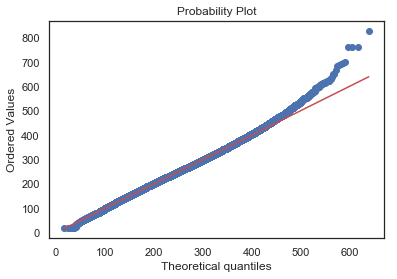

In [23]:
fig = plt.figure()
res = stats.probplot(df1['Description_Length'], 
                     dist=stats.gamma(a= alpha, loc=loc, scale=beta), plot=plt)
plt.show()

#### The plot above indicates that the deviation from the gamma distribution lies in descriptions with a length that exceeds 400 words. Now we will further segment the data into quartiles in order to observe the characteristics of the description field.

In [24]:
Q3 = np.quantile(df1['Description_Length'], 0.75) 
Q1 = np.quantile(df1['Description_Length'], 0.25) 
IQR = Q3 - Q1 

outlier_score_threshold_high = Q3 + 1.5 * IQR
outlier_score_threshold_low = Q1 - 1.5 * IQR

outlier_number_total=len(df1[np.logical_or(df1['Description_Length'] > 
                                          outlier_score_threshold_high,
                         df1['Description_Length'] < outlier_score_threshold_low)])

outlier_number_low = len(df1[df1['Description_Length'] < outlier_score_threshold_low])
outlier_number_high = outlier_number_total - outlier_number_low

print("Number of outliers (high - low):", outlier_number_total, 
      "(",outlier_number_high,"-",outlier_number_low,")",
      "\nOutlier proportion:", 
      round(outlier_number_total/len(df1['Description_Length'])*100, 3),"%",
      "\nOutlier threshold lengths (high - low):", 
      outlier_score_threshold_high,"-",outlier_score_threshold_low)

Number of outliers (high - low): 2208 ( 2087 - 121 ) 
Outlier proportion: 1.463 % 
Outlier threshold lengths (high - low): 415.5 - 59.5


#### As we can see, outliers make up about 1.463% of the data set. 
#### We believe it would be interesting to test whether there is any correlation between the length of the description and the score given to a wine. Let's use a scatterplot to visualize this relationship.

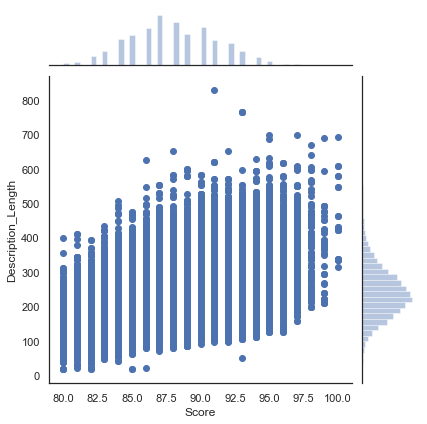

Correlation between Score and Description_Length: 0.52


In [25]:
sns.jointplot(x="Score", y="Description_Length", data=df1)
plt.show()

corr= np.corrcoef(df1["Score"], df1["Description_Length"])[0,1]
print("Correlation between Score and Description_Length:",round(corr,2))

#### As we can see, the correlation is not quite strong (coefficient is below 0.7), but it is still positive. We cannot confirm there is a significant relationship between these two data points.

### Part 4: Finding the Top 15 Most Frequently Used Words in Wine Descriptions

#### We will begin by separating the description from the scores.

In [26]:
corpus = df1["Description"].values
Y = df1["Score"].values

In [27]:
customStopWords = text.ENGLISH_STOP_WORDS.union(['wine', '2009', '2010','2011', '2012', '2013', '2014', '2015','2016', '2017', '2018',
                                                 '2019', '2020', '2021', '2022','2023', '2024', '2025', '2030', '100', '10', '12',
                                                 '14', '15', '20', '25', '30','40', '50', '60', '70', '90'])

CV = CountVectorizer(stop_words=customStopWords, max_features=1000, ngram_range=(1,2))
X = CV.fit_transform(corpus)

print("Number of entries (rows):", X.shape[0],\
      "\nNumber of features (columns):", X.shape[1])

Number of entries (rows): 150930 
Number of features (columns): 1000


In [28]:
X_array = X.toarray()

inverted_dict = dict([[v,k] for k,v in CV.vocabulary_.items()])
final_dict = {} 

for x in range(len(X_array[0,:])): 
    final_dict[inverted_dict[x]]=np.sum(X_array[:,x]) 

print("15 most frequent words:",sorted(final_dict.items(), 
                                       key = lambda kv:(kv[1], kv[0]), reverse=True)[0:15])

15 most frequent words: [('flavors', 77992), ('fruit', 60474), ('finish', 37777), ('aromas', 35861), ('cherry', 32770), ('acidity', 32662), ('tannins', 32240), ('palate', 29404), ('ripe', 27096), ('black', 26591), ('dry', 24942), ('drink', 24146), ('spice', 23096), ('sweet', 22579), ('rich', 21433)]


#### We can now look at the list of 15 most frequently used words along with the number of instances these appear in the wine descriptions.

### Part 5: Observations on Varieties

#### Lastly, let's take a look at the varieties of wine in the list.

In [29]:
df.variety.describe()

count         150930
unique           632
top       Chardonnay
freq           14482
Name: variety, dtype: object

#### We can see that there are a total of 632 varieties, with Chardonnay being the most frequently listed.

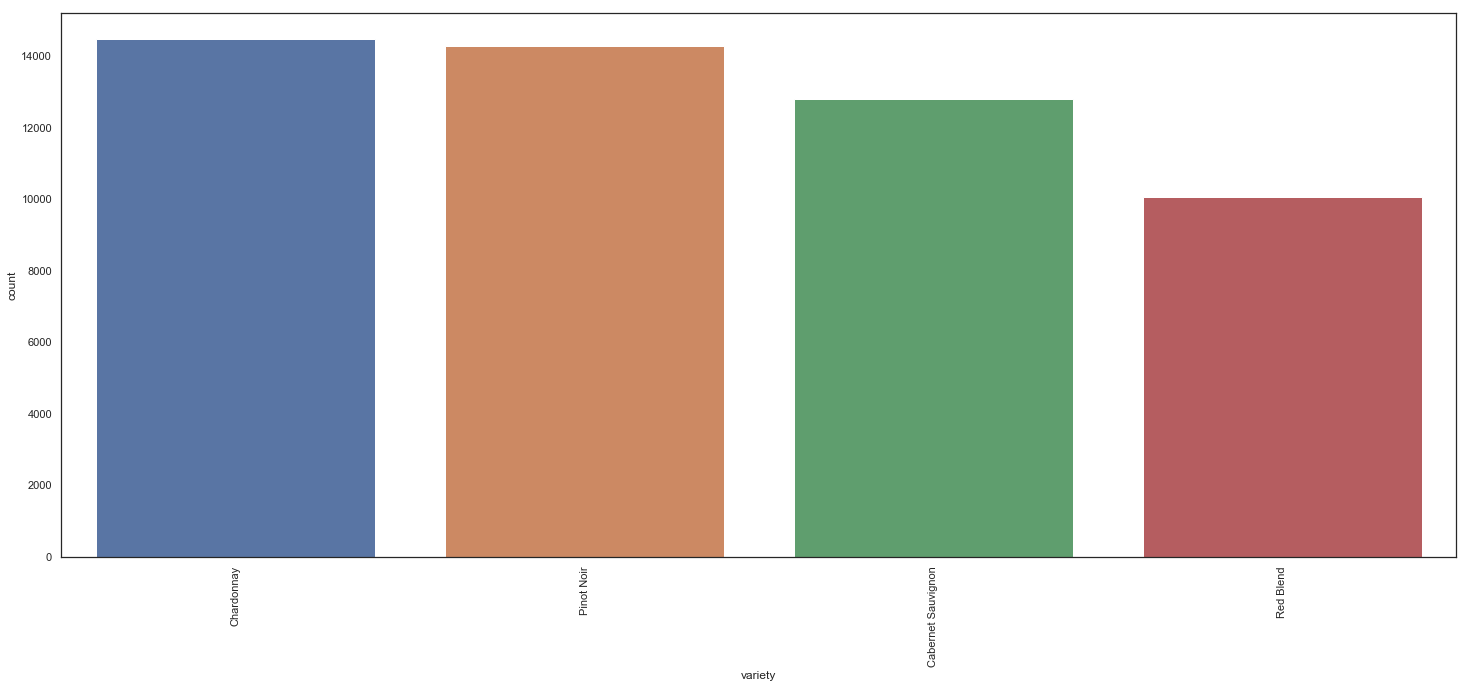

In [30]:
variety_df = df.groupby('variety').filter(lambda x: len(x) > 10000)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
sns.set(font_scale = 2)
plt.xticks(rotation = 90)
plt.show()

#### By narrowing down to varieties that are listed at least 10,000 times, we realize that there are four main varieties: Chardonnay, Pinot Noir, Cabernet Sauvignon, and Red Blend.

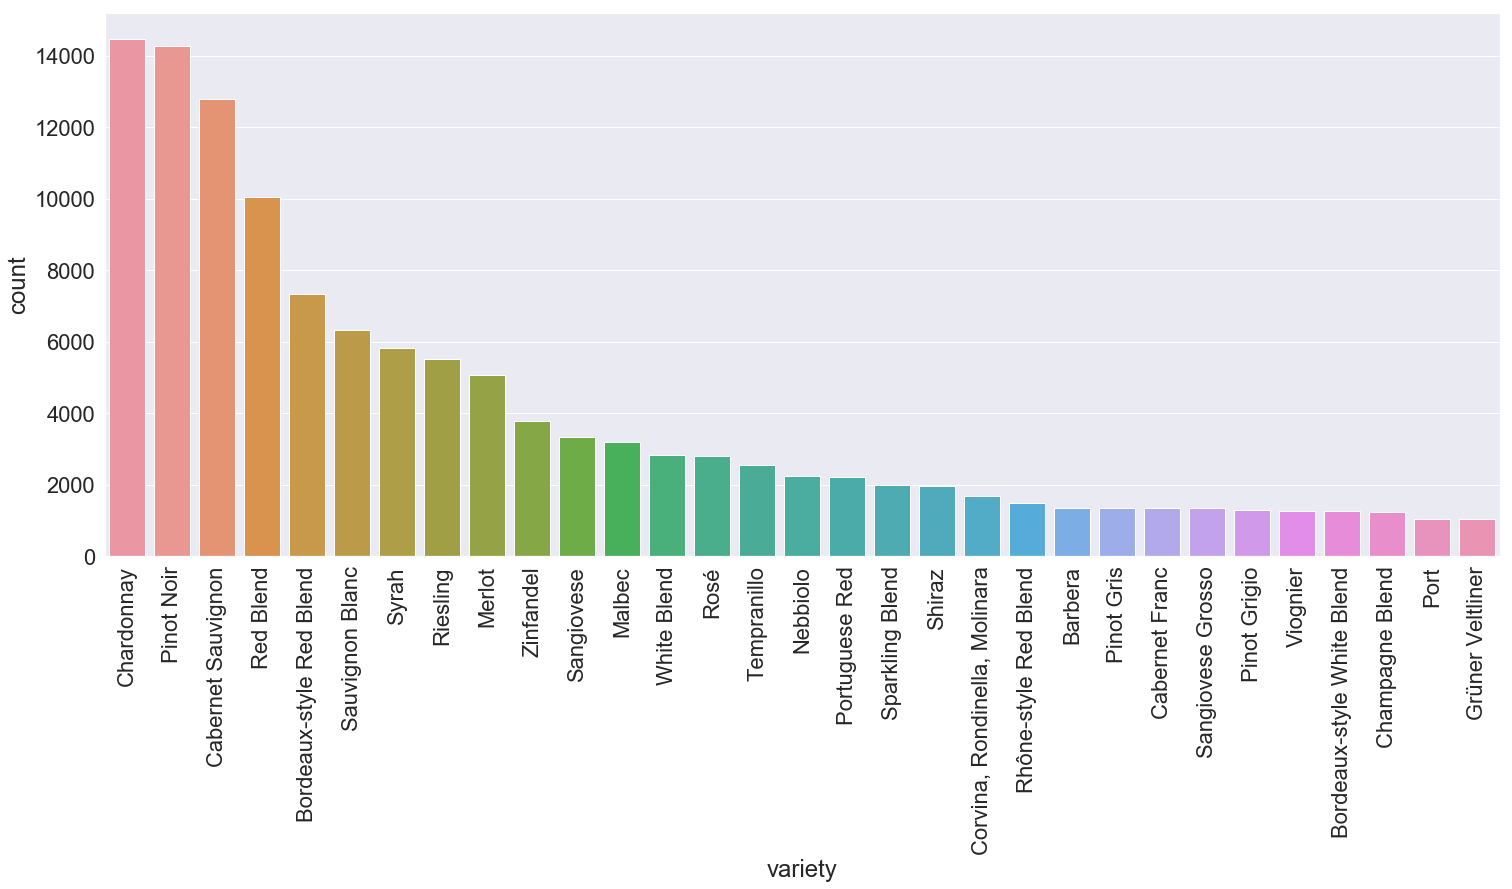

In [31]:
variety_df = df.groupby('variety').filter(lambda x: len(x) > 1000)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
sns.set(font_scale = 2)
plt.xticks(rotation = 90)
plt.show()

#### Additionally, if we look at varieties that are listed at least 1,000 times, the data set demonstrates a lot more flavor options.

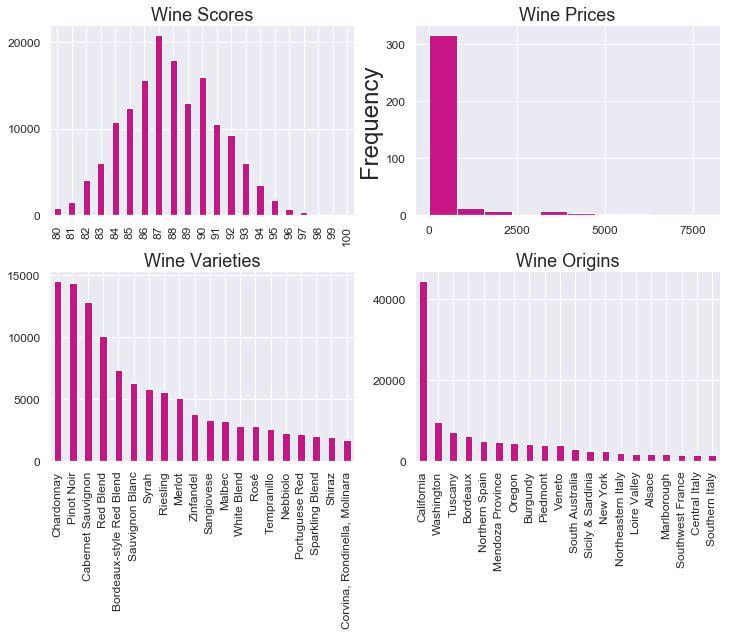

In [32]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

df['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

df['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

df['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

df['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

import seaborn as sns
sns.despine()

#### Lastly, in order to evaluate the "big picture" of our dataset, we have summarized a few of our findings in the graphs above. 
#### We hope that our observations and analysis provide the readers (and wine enthusiasts!) with insight on the many ways that pricing, grape varieties, and country of origin relate to wine ratings. 

# Cheers!
#### Bethel Hailemichael and Carmina Magnani